<a href="https://www.kaggle.com/code/rudrapatel7890/covid-19-analysis?scriptVersionId=194713058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **COVID-19 - Analysis & Visualizations**


### Importing libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Datasets

In [67]:
covid_cases = pd.read_csv("/kaggle/input/covid-19-who-dataset/WHO-COVID-19-global-data.csv", encoding='latin1')
covid_vacc = pd.read_csv("/kaggle/input/covid-19-who-dataset/vaccination-data.csv")
cov_vaccines = pd.read_csv(r"/kaggle/input/covid-19-who-dataset/Vaccination C19 WHO.csv")

### Structure of dataframe

In [68]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [69]:
covid_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               215 non-null    object 
 1   ISO3                                  215 non-null    object 
 2   WHO_REGION                            209 non-null    object 
 3   DATA_SOURCE                           215 non-null    object 
 4   DATE_UPDATED                          208 non-null    object 
 5   TOTAL_VACCINATIONS                    209 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         209 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             207 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  207 non-null    float64
 9   PERSONS_LAST_DOSE                     209 non-null    float64
 10  PERSONS_LAST_DOSE_PER100              207 non-null    float64
 11  VACCINES_USED      

In [70]:
cov_vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ISO3                1105 non-null   object 
 1   PRODUCT_NAME        1098 non-null   object 
 2   VACCINE_NAME        1105 non-null   object 
 3   COMPANY_NAME        1054 non-null   object 
 4   AUTHORIZATION_DATE  177 non-null    object 
 5   START_DATE          310 non-null    object 
 6   END_DATE            0 non-null      float64
 7   COMMENT             0 non-null      float64
 8   DATA_SOURCE         1105 non-null   object 
dtypes: float64(2), object(7)
memory usage: 77.8+ KB


In [71]:
covid_cases.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [72]:
cov_vaccines.head(20)

,ISO3,PRODUCT_NAME,VACCINE_NAME,COMPANY_NAME,AUTHORIZATION_DATE,START_DATE,END_DATE,COMMENT,DATA_SOURCE
0,SHN,AZD1222,AstraZeneca - AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
1,GRL,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
2,FRO,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
3,FRO,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
4,JEY,mRNA-1273,Moderna - mRNA-1273,Moderna,NaN,NaN,NaN,NaN,OWID
5,JEY,AZD1222,AstraZeneca - AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
6,JEY,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
7,BIH,AZD1222,AstraZeneca - AZD1222,AstraZeneca,NaN,NaN,NaN,NaN,OWID
8,BIH,Comirnaty,Pfizer BioNTech - Comirnaty,Pfizer BioNTech,NaN,NaN,NaN,NaN,OWID
9,BIH,Coronavac,Sinovac - CoronaVac,Sinovac,NaN,NaN,NaN,NaN,OWID


## **Exploratory Data Analysis**

### Countries with most Covid Cases 

In [73]:
total_cases_country = covid_cases.groupby('Country')['New_cases'].sum().sort_values(ascending=False)
total_cases_country


Country
United States of America                    103436829.00
China                                        99375079.00
India                                        45042054.00
France                                       38997490.00
Germany                                      38437756.00
                                                ...     
International conveyance (American Samoa)           4.00
Pitcairn                                            4.00
International conveyance (Kiribati)                 2.00
Turkmenistan                                        0.00
Democratic People's Republic of Korea               0.00
Name: New_cases, Length: 240, dtype: float64

### Countries with most Deaths

In [74]:
country_deaths = covid_cases.groupby('Country')['New_deaths'].sum().sort_values(ascending=False)
country_deaths


Country
United States of America                     1194158.00
Brazil                                        702116.00
India                                         533626.00
Russian Federation                            403202.00
Mexico                                        334586.00
                                                ...    
International conveyance (Solomon Islands)         0.00
Niue                                               0.00
Holy See                                           0.00
International conveyance (Kiribati)                0.00
Turkmenistan                                       0.00
Name: New_deaths, Length: 240, dtype: float64

### Top 10 Countries with Highest Death Ratio Per 1000 People


In [75]:
covid_cases = covid_cases.dropna(subset=['New_cases', 'New_deaths'])
country_agg = covid_cases.groupby('Country').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()

# Rename columns
country_agg = country_agg.rename(columns={
    'New_cases': 'Cases',
    'New_deaths': 'Deaths'
}).reset_index(drop=True)

top10_cases = country_agg.sort_values('Cases', ascending=False).head(10)
top10_cases['Death_Ratio_Per_1000'] = (top10_cases['Deaths'] / top10_cases['Cases']) * 1000
top10_cases_sorted = top10_cases.sort_values('Death_Ratio_Per_1000', ascending=False).reset_index(drop=True)

print(top10_cases_sorted[['Country', 'Cases', 'Deaths',  'Death_Ratio_Per_1000']])


                                             Country        Cases     Deaths  \
0                                             Brazil  37511837.00  702116.00   
1                                              India  45040782.00  533626.00   
2                           United States of America 103436789.00 1127152.00   
3  United Kingdom of Great Britain and Northern I...  24793255.00  232112.00   
4                                              Italy  26781075.00  197307.00   
5                                            Germany  38437742.00  174979.00   
6                                             France  38997474.00  151365.00   
7                                              Japan  31666650.00   74694.00   
8                                              China  96048177.00  122309.00   
9                                  Republic of Korea  33340243.00   35934.00   

   Death_Ratio_Per_1000  
0                 18.72  
1                 11.85  
2                 10.90  
3              

### Total Cases by WHO Region

In [76]:
region_agg = covid_cases.groupby('WHO_region').agg({'New_cases': 'sum'}).reset_index()
region_agg = region_agg.rename(columns={'New_cases': 'Total_Cases'})
region_agg_sorted = region_agg.sort_values('Total_Cases', ascending=False).reset_index(drop=True)
region_agg_sorted['Total_Cases'] = region_agg_sorted['Total_Cases'].astype(int)
print(region_agg_sorted)


  WHO_region  Total_Cases
0       EURO    278800764
1       WPRO    200156036
2       AMRO    192418516
3      SEARO     61227274
4       EMRO     23067888
5       AFRO      8581118
6      OTHER          341


In [77]:
covid_vacc.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.00,90493.00,203.00,85.00,84363.00,79.00,NaN,2021-02-17,NaN,35659.00,33.00
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.00,19151369.00,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.00,16550642.00,85.00,50.00,9609080.00,29.00,NaN,2021-03-10,NaN,3067091.00,9.00
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.00,10858.00,166.00,72.00,10382.00,69.00,NaN,2021-02-05,NaN,3231.00,22.00
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.00,1349255.00,107.00,47.00,1279333.00,44.00,NaN,2021-01-13,NaN,402371.00,14.00


In [78]:
# Join the datasets on the 'Country' and 'WHO_region' columns
merged_data = covid_cases.merge(covid_vacc, left_on=['Country', 'WHO_region'], right_on=['COUNTRY', 'WHO_REGION'])
merged_data['Vaccination_to_Cases_Ratio'] = ((merged_data['TOTAL_VACCINATIONS'] / merged_data['Cumulative_cases']) * 100).round(2)
merged_data[['Country', 'WHO_region', 'TOTAL_VACCINATIONS', 'Cumulative_cases', 'Vaccination_to_Cases_Ratio']]


,Country,WHO_region,TOTAL_VACCINATIONS,Cumulative_cases,Vaccination_to_Cases_Ratio
0,Afghanistan,EMRO,22964750.00,91,25235989.01
1,Afghanistan,EMRO,22964750.00,274,8381295.62
2,Afghanistan,EMRO,22964750.00,521,4407821.50
3,Afghanistan,EMRO,22964750.00,908,2529157.49
4,Afghanistan,EMRO,22964750.00,1330,1726672.93
...,...,...,...,...,...
23719,Zimbabwe,AFRO,13935112.00,266048,5237.82
23720,Zimbabwe,AFRO,13935112.00,266117,5236.46
23721,Zimbabwe,AFRO,13935112.00,266202,5234.79
23722,Zimbabwe,AFRO,13935112.00,266355,5231.78


### Top 10 Countries with most Vaccinations

In [79]:
# Disabled scientific notation : Set display.float_format, it ensures all floating-point numbers are displayed in two decimal places ({:.2f}). 
# Useful for avoiding scientific notation (e+10) and for making the data more readable.
pd.set_option('display.float_format', '{:.2f}'.format)

# Group by 'COUNTRY' and sum the 'TOTAL_VACCINATIONS'
highest_vacc = merged_data[['COUNTRY', 'TOTAL_VACCINATIONS']].groupby('COUNTRY').sum()
highest_vacc_sorted = highest_vacc.sort_values(by='TOTAL_VACCINATIONS', ascending=False)
print(highest_vacc_sorted.head(10))


                          TOTAL_VACCINATIONS
COUNTRY                                     
China                        692825501249.00
India                        494673778144.00
United States of America     119584716720.00
Indonesia                     86502572980.00
Brazil                        85179122490.00
Japan                         71503839660.00
Bangladesh                    63027995466.00
Pakistan                      50464173312.00
Mexico                        43778579721.00
Russian Federation            42721387824.00


### Top 20 Countries by Percentage of Population with At Least One COVID-19 Vaccine Dose

In [80]:
country_one_plus_dose = merged_data[['COUNTRY', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100']].groupby('COUNTRY').mean()
country_one_plus_dose = country_one_plus_dose.sort_values(by='PERSONS_VACCINATED_1PLUS_DOSE_PER100', ascending=False).head(20)
country_one_plus_dose

,PERSONS_VACCINATED_1PLUS_DOSE_PER100
COUNTRY,
Puerto Rico,100.00
Nauru,100.00
Palau,100.00
United Arab Emirates,100.00
Brunei Darussalam,100.00
Qatar,99.00
Nicaragua,97.00
Nepal,96.00
Samoa,96.00


### Total Cases by WHO Region 

In [81]:
region_vacc = merged_data[['WHO_REGION','TOTAL_VACCINATIONS']].groupby('WHO_REGION').sum()
region_vacc = region_vacc.sort_values(by='TOTAL_VACCINATIONS',ascending=False)
region_agg

,WHO_region,Total_Cases
0,AFRO,8581118.00
1,AMRO,192418516.00
2,EMRO,23067888.00
3,EURO,278800764.00
4,OTHER,341.00
5,SEARO,61227274.00
6,WPRO,200156036.00


In [82]:
merged_data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,COUNTRY,ISO3,...,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100,Vaccination_to_Cases_Ratio
0,2020-03-29,AF,Afghanistan,EMRO,67.00,91,2.00,2,Afghanistan,AFG,...,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00,25235989.01
1,2020-04-05,AF,Afghanistan,EMRO,183.00,274,3.00,5,Afghanistan,AFG,...,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00,8381295.62
2,2020-04-12,AF,Afghanistan,EMRO,247.00,521,10.00,15,Afghanistan,AFG,...,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00,4407821.50
3,2020-04-19,AF,Afghanistan,EMRO,387.00,908,15.00,30,Afghanistan,AFG,...,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00,2529157.49
4,2020-04-26,AF,Afghanistan,EMRO,422.00,1330,13.00,43,Afghanistan,AFG,...,59.00,49.00,18370386.00,47.00,NaN,2021-02-22,NaN,2729940.00,7.00,1726672.93


### Number of Countries Vaccines exported by Company

In [83]:
company_vaccine_distribution = cov_vaccines.groupby('COMPANY_NAME').size().reset_index(name='Total_Vaccines')
company_vaccine_distribution

,COMPANY_NAME,Total_Vaccines
0,Anhui Zhifei Longcom Biopharmaceutical,3
1,AstraZeneca,147
2,Beijing Bio-Institute Biological Products (CNBG),101
3,Bharat Biotech,33
4,Biological E,1
5,CanSino Biologicals,28
6,Center for Genetic Engineering and Biotechnology,5
7,Chumakov,1
8,Gamaleya Research Institute,99
9,Insitute of Medical Biology,1


## **Visualizations**

### Total Covid Cases in each WHO Region

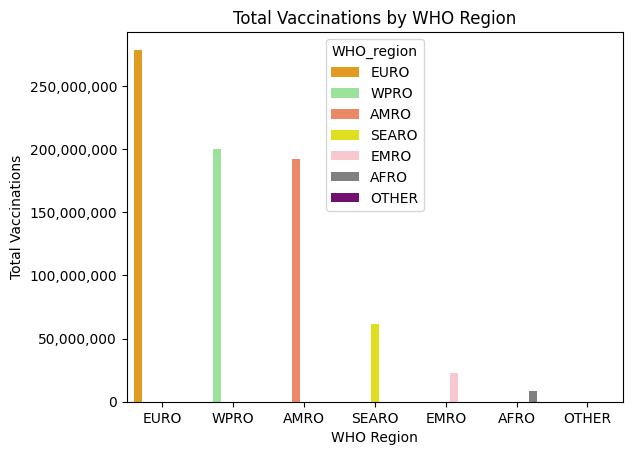

In [84]:
import matplotlib.ticker as ticker
region_agg_sorted = region_agg.reset_index().sort_values(by='Total_Cases', ascending=False)

palette = ['orange', 'lightgreen', 'coral', 'yellow', 'pink', 'gray','purple']
sns.barplot(data=region_agg_sorted.reset_index(), x='WHO_region', y='Total_Cases', hue='WHO_region', palette=palette)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('WHO Region')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by WHO Region')
plt.show()

### Top 20 Countries with Highest Total deaths

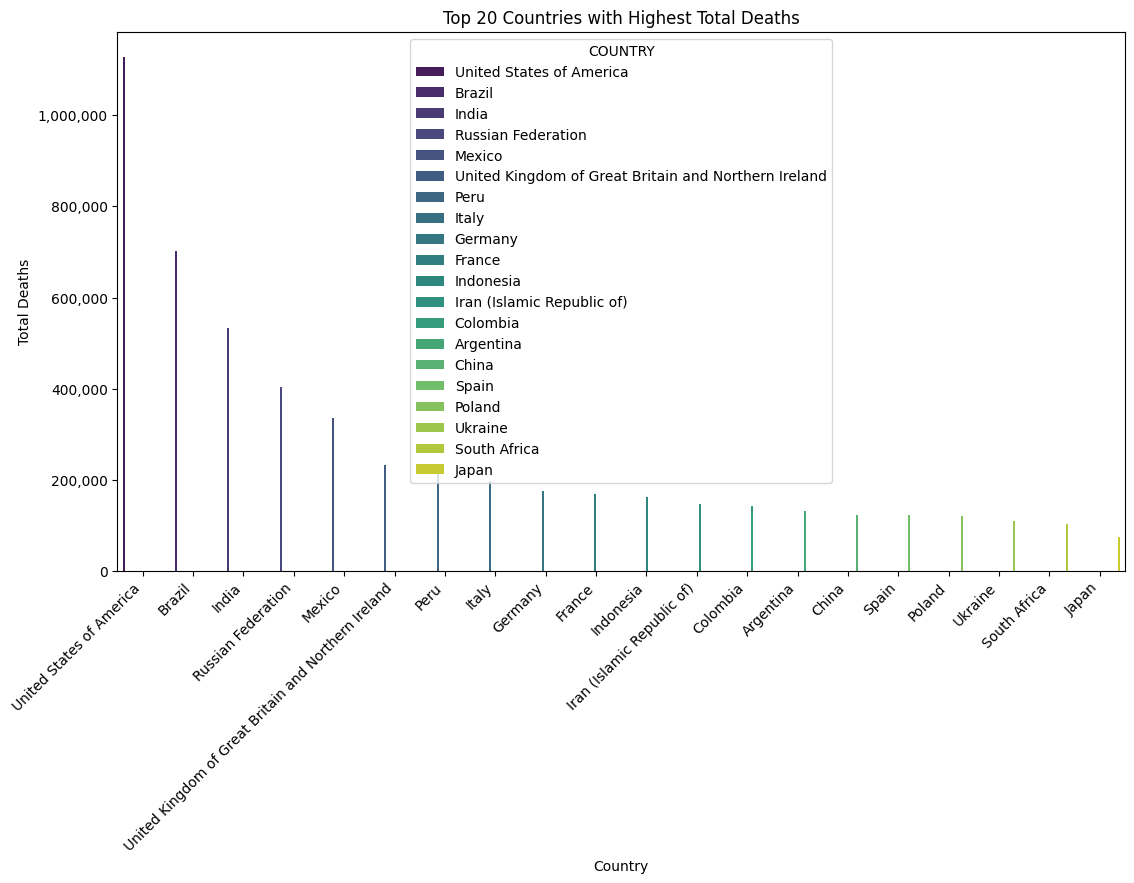

In [85]:
merged_data = covid_cases.merge(covid_vacc, left_on=['Country', 'WHO_region'], right_on=['COUNTRY', 'WHO_REGION'])
merged_data['Vaccination_to_Cases_Ratio'] = ((merged_data['TOTAL_VACCINATIONS'] / merged_data['Cumulative_cases']) * 100).round(2)
merged_data[['Country', 'WHO_region', 'TOTAL_VACCINATIONS', 'Cumulative_cases', 'Vaccination_to_Cases_Ratio']]

country_deaths = merged_data[['COUNTRY', 'Cumulative_deaths']].groupby('COUNTRY').max()
country_deaths = country_deaths.sort_values(by='Cumulative_deaths', ascending=False).head(20)
country_deaths = country_deaths.reset_index()

plt.figure(figsize=(13, 7))
sns.barplot(data=country_deaths, x='COUNTRY', y='Cumulative_deaths', palette='viridis', hue='COUNTRY')
plt.title('Top 20 Countries with Highest Total Deaths')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))     
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')
plt.show()


### Total Vaccinations in each WHO Region

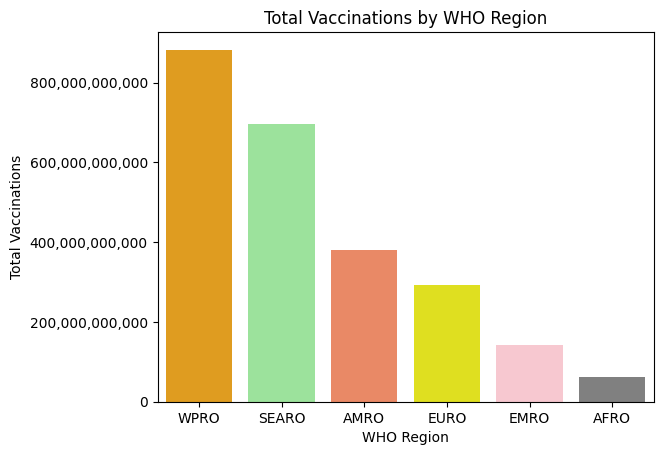

In [86]:
# Grouping and summing the data
region_vacc = merged_data[['WHO_REGION', 'TOTAL_VACCINATIONS']].groupby('WHO_REGION').sum()
region_vacc = region_vacc.sort_values(by='TOTAL_VACCINATIONS', ascending=False).reset_index()
palette = ['orange', 'lightgreen', 'coral', 'yellow', 'pink', 'gray']

# Creating barplot
sns.barplot(data=region_vacc, x='WHO_REGION', y='TOTAL_VACCINATIONS', palette=palette)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('WHO Region')
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by WHO Region')
plt.show()


### Person Vaccinated with 1+ Dose per 100 by each Country

In [87]:
# Group by COUNTRY and sort by PERSONS_VACCINATED_1PLUS_DOSE_PER100
country_one_plus_dose = merged_data[['COUNTRY', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100']].groupby('COUNTRY').mean()
country_one_plus_dose = country_one_plus_dose.sort_values(by='PERSONS_VACCINATED_1PLUS_DOSE_PER100', ascending=False).head(20)
country_one_plus_dose

plt.figure(figsize = (13,7))
sns.barplot(data=country_one_plus_dose, x = 'COUNTRY', y = 'PERSONS_VACCINATED_1PLUS_DOSE_PER100', hue = 'COUNTRY').set_title('Person Vaccinated 1 Plus Dose Per 100 By Country')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('More than 1 Dose Vaccinated per 100')
plt.show()

ValueError: Could not interpret input 'COUNTRY'

<Figure size 1300x700 with 0 Axes>

### Person Vaccinated per 100 by each Country

In [ ]:
# Group by COUNTRY and sort by PERSONS_BOOSTER_ADD_DOSE_PER100
country_one_plus_dose = merged_data[['COUNTRY', 'PERSONS_BOOSTER_ADD_DOSE_PER100']].groupby('COUNTRY').mean()
country_one_plus_dose = country_one_plus_dose.sort_values(by='PERSONS_BOOSTER_ADD_DOSE_PER100', ascending=False).head(20)

plt.figure(figsize = (13,7))
sns.barplot(data=country_one_plus_dose, x = 'COUNTRY', y = 'PERSONS_BOOSTER_ADD_DOSE_PER100', palette='Set3', hue = 'COUNTRY').set_title('Person Vaccinated Per 100 By Country')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.ylabel('More than 1 Dose Vaccinated per 100')
plt.show()

### Total vaccinations by Country


In [ ]:
country_booster_dose = merged_data[['COUNTRY', 'TOTAL_VACCINATIONS']].groupby('COUNTRY').mean()
country_booster_dose = country_booster_dose.sort_values(by='TOTAL_VACCINATIONS', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=country_booster_dose.reset_index(), x='COUNTRY', y='TOTAL_VACCINATIONS', palette='Set2', hue ='COUNTRY')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.ylabel('Total Vaccinations')
plt.title('Total Vaccinations by Country')
plt.show()

### Top 10 Vaccine Companies with most supplies to Countries


In [ ]:
company_vaccine_distribution = cov_vaccines.groupby('COMPANY_NAME').size().reset_index(name='Total_Vaccines')
top_10_companies = company_vaccine_distribution.sort_values(by='Total_Vaccines', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_companies, x='COMPANY_NAME', y='Total_Vaccines', palette='viridis', hue = 'COMPANY_NAME')
plt.title('Top 10 Vaccine Companies by Total Supplies to Countries')
plt.xlabel('Vaccine Company')
plt.ylabel('No. Countries Vaccimes Supplied')
plt.xticks(rotation=45, ha='right')
plt.show()
